# SRQM Session 2

   F. Briatte and I. Petev

 - TOPIC:  Social Determinants of Adult Obesity in the United States

 - DATA:   U.S. National Health Interview Survey (2009)

 - Hi! Welcome to your second SRQM do-file.

 - All the do-files for this course assume that you have set up Stata first by
   adjusting some parameters, most importantly setting the working directory to
   your SRQM folder. Please refer to the do-file from Session 1 for guidance.

 - Welcome again to Stata. Read the comment lines as you go along, and run the
   code by executing command lines sequentially. Select lines with Cmd-L (Mac)
   or Ctrl-L (Win), and execute them with Cmd-Shift-D (Mac) or Ctrl-D (Win).

 - We will explore the National Health Interview Survey with a few basic Stata
   commands. This is to show you how to explore a dataset and its variables. You
   need to make a choice of dataset for your project by the end of the week.

 - If you want to study one country or compare two of them, turn to survey data
   from the European Social Survey (ESS), U.S. General Social Survey (GSS) or
   World Values Survey (WVS).

 - If you want to study country-level data, use the Quality of Government (QOG)
   dataset. Your sample should be all world countries: do not further restrict
   the sample further by subsetting to less observations.

   Last updated 2013-08-17.


In [1]:
* Change to main dir
cd ../

* Allow Stata to scroll through the results.
set more off

* Log results.
cap log using code/week2.log, replace


/Users/kyle/tmp/srqm




Load NHIS dataset.

In [2]:
use data/nhis9711, clear

(U.S. National Health Interview Survey 1997-2011)


Once the dataset is loaded, the Variables window will fill up, and you will
be able to look at the actual dataset from the Data Editor. Read from the
course material to make sure that you know how to read through a dataset:
its data structure shows observations in rows and variables in columns.

List all variables in the dataset.

In [3]:
describe


Contains data from data/nhis9711.dta
  obs:       410,942                          U.S. National Health Interview
                                                Survey 1997-2011
 vars:            23                          2 Sep 2013 15:14
 size:    25,889,346                          (_dta has notes)
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
year            int     %8.0g      year_lbl   Survey year
serial          long    %12.0g                Sequential Serial Number,
                                                Household Record
strata          int     %8.0g      strata_lbl
                                              Stratum for variance estimation
psu             int     %8.0g      psu_lbl    Primary sampling unit (PSU) for
                                 

Finding variables
-----------------

Locate some variables of interest by looking for keywords in the variables.
You can explore your dataset by looking for particular keywords in the
variable names and labels. This is particularly useful when your dataset
comes with variable names that are hard or impossible to understand by
themselves, such as `v1` or `epi_epi`. The example below will identify
several variables with either `height` or `weight` in their descriptors.

In [4]:
lookfor height weight


              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
perweight       double  %9.0f                 Final basic annual weight
sampweight      double  %9.0f                 Sample Person Weight
height          byte    %30.0g     height_lbl
                                              Height in inches without shoes
weight          int     %36.0g     weight_lbl
                                              Weight in pounds without clothes
                                                or shoes


List their values for the first ten observations.

In [5]:
list height weight in 1/10


     +----------------------------------------------------------------+
     |                      height                             weight |
     |----------------------------------------------------------------|
  1. |                          68                                180 |
  2. |                          67                                150 |
  3. |                          62                                120 |
  4. |                          73                                217 |
  5. |                          67                                140 |
     |----------------------------------------------------------------|
  6. |                          73                                170 |
  7. |                          65                                125 |
  8. |                          65                                150 |
  9. | Exceptionally short or tall   Exceptionally low or high weight |
 10. |                          60                             

Subsetting to cross-sectional format
------------------------------------

Our first step verifies whether the survey is cross-sectional. As we find
that the data contains more than one survey wave and spans over several years,
we keep only most recent observations. This step applies only to datasets that
contain multiple survey years, which is generally not the case in this course.

Check whether the survey is cross-sectional.

In [6]:
lookfor year
tab year



              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
year            int     %8.0g      year_lbl   Survey year
yrsinus         byte    %30.0g     yrsinus_lbl
                                              Number of years spent in the U.S.
earnings        byte    %23.0g     earnings_lbl
                                              Person's total earnings, previous
                                                calendar year


Survey year |      Freq.     Percent        Cum.
------------+-----------------------------------
       1998 |     32,440        7.89        7.89
       1999 |     30,801        7.50       15.39
       2000 |     32,374        7.88       23.27
       2001 |     33,326        8.11       31.38
       2002 |     31,044        7.55       38.93
       2003 |     30,852        7.51       46.44
       2004 |     31,326        7.62       54.

The data should be cross-sectional for the purpose of this course. However,
the dataset contains observations for more than one year. We will solve that
issue by keeping observations for the 2009 survey year only.

Keep observations for the single latest survey year.

In [7]:
keep if year == 2011

(377,928 observations deleted)


The `keep` command keeps only observations for which the variable `year` is
equal (`==`) to 2011: all other dataset observations are dropped. Similarly:

In [8]:
drop if year != 2011

(0 observations deleted)


The `drop` command tried to delete observations for which the `year` variable
is different (`!=`) from 2011 (but none were left after the `keep` command).

Notice that the 'equal to' operator in Stata is a double equal sign (`==`).
The space around logical operators is optional but recommended for clarity.

Make sure that you fully understand how cross-sectional data are arranged by
opening the Data Editor or using the `browse` command to take a quick look.

Survey weights
--------------

The command below sets survey weights, which can be used to obtain weighted
estimates at later stages of the analysis. We will not require them much.

Survey weights (see NHIS documentation).

In [9]:
svyset psu [pw = perweight], strata(strata)


      pweight: perweight
          VCE: linearized
  Single unit: missing
     Strata 1: strata
         SU 1: psu
        FPC 1: <zero>


# Variable Manipulation

Dependent variable: Body Mass Index
-----------------------------------

Our next step is to compute the Body Mass Index for each observation in the
dataset (i.e. for each respondent to the survey) from their height and weight
by using the `height` and `weight` variables, and the formula for BMI.

Create the Body Mass Index from height and weight. We can write the `generate`
command as its `gen` shorthand. We will later call BMI our dependent variable,
and we will use other (independent) variables to try to predict its values.

In [10]:
gen bmi = weight * 703 / height^2 if weight < 996 & height < 96

(2,939 missing values generated)


If something looks wrong later on in your analysis, check your BMI equation.
Also note that Stata is case-sensitive: we will write 'BMI' in the comments,
but the variable itself is called `bmi` and should be written in lowercase.

Labelling a variable
--------------------

Add a description label to the variable. All label commands start with `label`
(shorthand `la`). The one below labels a variable (shorthand `var`).

In [11]:
la var bmi "Body Mass Index"

List BMI among the variables included in the current dataset.

In [12]:
d bmi


              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
bmi             float   %9.0g                 Body Mass Index


The `describe` command (shorthand `d`) shows that the BMI variable is now
part of the NHIS dataset. However, **DO NOT SAVE** your dataset, even when you
perform a useful operation like this one. Instead, you will run the do-file
to generate the variable again, hence making your calculation of BMI fully
understandable and replicable by an exterior observer, like us, or anyone.

Take a look at the BMI of a few respondents. Values between 15 and 40 are
expected for human beings as we know them on this planet. We also list a
few other variables to start thinking about possible relationships.

In [13]:
li sex age health bmi in 50/60
li sex age health bmi in -10/l



     +-------------------------------------+
     |    sex   age      health        bmi |
     |-------------------------------------|
 50. |   Male    36        Good   25.84016 |
 51. | Female    79        Fair   23.77471 |
 52. |   Male    33        Good   32.97992 |
 53. |   Male    48   Very Good    23.4817 |
 54. |   Male    30   Excellent   27.36592 |
     |-------------------------------------|
 55. | Female    36   Excellent   21.41042 |
 56. | Female    81        Poor   21.30303 |
 57. | Female    28        Good          . |
 58. | Female    36   Excellent   29.12429 |
 59. |   Male    65        Good   36.48789 |
     |-------------------------------------|
 60. | Female    72        Fair   25.31631 |
     +-------------------------------------+


       +-------------------------------------+
       |    sex   age      health        bmi |
       |-------------------------------------|
33005. |   Male    68        Fair   32.57385 |
33006. | Female    71   Very Good   21.2979

Summary statistics
------------------

We now turn to analysing the newly created `bmi` variable, using the
`summarize` command (shorthand `su`) to obtain its mean, min and max values,
as well as standard deviation, which we will cover later on.

In [14]:
su bmi


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         bmi |     30,075    27.40348     5.37004   14.76581   54.52744


Add the `detail` option (shorthand `d`) for precise statistics that cover
its mean, minimum and maximum values, as well as its percentile distribution.

In [15]:
su bmi, d


                       Body Mass Index
-------------------------------------------------------------
      Percentiles      Smallest
 1%     18.30296       14.76581
 5%     20.11707       14.76581
10%     21.25472       15.20329       Obs              30,075
25%     23.49076        15.5041       Sum of Wgt.      30,075

50%     26.57845                      Mean           27.40348
                        Largest       Std. Dev.       5.37004
75%     30.42568       51.70008
90%      34.7627         52.725       Variance       28.83733
95%     37.75879       52.91181       Skewness       .8178421
99%     42.96111       54.52744       Kurtosis       3.670821


Further sessions will gradually explain how to read each statistic displayed.
For now, just note that the median respondent in the dataset, which is meant
to be representative of the United States adult population in 2009, has a
BMI of 26, which indicates overweight. The average (mean) BMI is over that
value, which indicates that higher BMI values are either more frequent
and/or more extreme than lower BMI values. You can also note that the top 1%
respondents has a BMI between 41 and 50, which indicates morbid obesity.

Visualization
-------------

Visualizing the distribution of BMI values among the observations contained
in the dataset will make these first insights more clear and more complete.
Create a histogram (shorthand `hist`) for the distribution of BMI.

(bin=44, start=14.765805, width=.90367341)


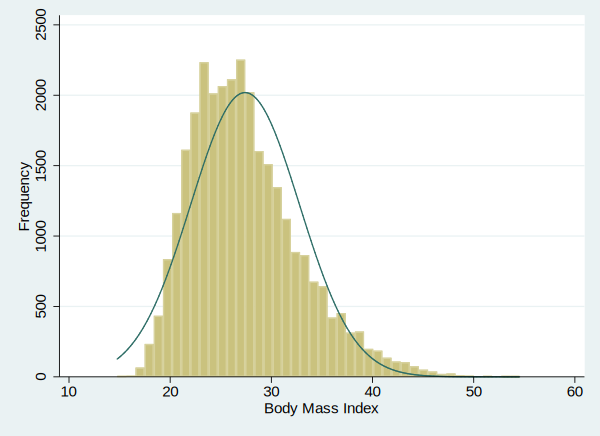

In [16]:
hist bmi, freq normal ///
    name(bmi)

A histogram describes the distribution of the variable in the sample, i.e.
the distribution of different values of BMI among the respondents to the
survey. The `freq` option specifies to use percentages, and the `normal`
option overlays a normal distribution to the histogram, a curve to which
we will soon come back when we cover essential statistical theory. The
`name` option saves the graph under that name in Stata temporary memory.

Another visualization is the boxplot, which uses different criteria to shape
the distribution of the variable. Refer to the course material to understand
how quartiles and outliers are constructed to form each element of the plot.
Also note that a boxplot is pretty uninformative if, as in this example, you
decide not to split the visualization over any number of categories.

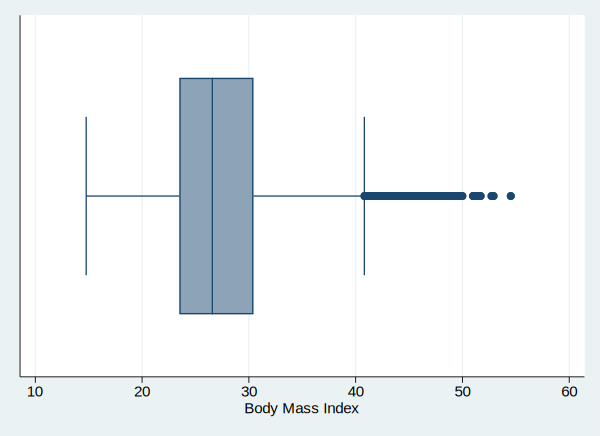

In [17]:
gr hbox bmi, ///
    name(bmi_boxplot)

The next example uses the `over() asyvars` options to produce boxplots of BMI
over gender groups, and then again over insurance status. This method creates
several box plots, one for each category -- a method called 'visualizing over
small multiples'. The result will stay in memory under the name given by the
`name()` option. Note, finally, that you need to select both lines to run the
command properly: if you do not include the final line, nothing will happen.

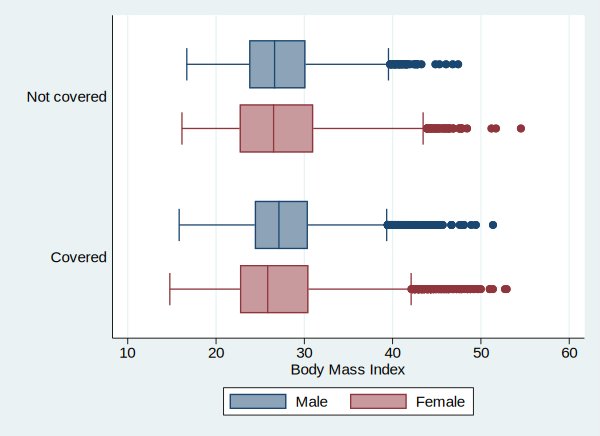

In [18]:
gr hbox bmi if uninsured != 9, over(sex) asyvars over(uninsured) ///
    name(bmi_sex_ins)

Logical expressions
-------------------

Note how the 'DK' category for insurance status was removed by using a call
to the conditional operator `if`, to exclude observations with an insurance
status equal to 9 when drawing the plot. This part of the command reads as:
draw a boxplot of all observations with an insurance status not equal to 9.

Here are more examples of logical expressions.

In [19]:
su bmi if age >= 20 & age < 25


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         bmi |      2,303    25.53716    5.203429   15.96345    47.4213


This command reads as: 'run the `summarize` command on the `bmi` variable,
but only for observations for which the `age` variable takes a value greater
than or equal to 20 and (`&`) lesser than 25.'

In [20]:
su bmi if sex == 1 & age >= 65


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         bmi |      2,585    27.67485    4.416014   17.62924   51.36558


This command reads as: 'summarize BMI for observations of `sex` equal to `1`
(i.e. males in this dataset) and of age greater or equal to `65`.'

In [21]:
su bmi if raceb == 2 | raceb == 3


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         bmi |      9,747    28.43252    5.498286   16.63905   51.70008


This command uses the `raceb` variable, which codes Blacks and Hispanics
with values 2 and 3. This command therefore summarises BMI only for these
two ethnic groups: the `|` symbol is the logical operator for 'or'. It
reads as: 'summarize BMI if the respondent is Black or Hispanic.'

If you have many categories to select, then using the `inlist` operator might
be much quicker. The example below selects a series of income categories that
fall either below the minimum wage in 2009 (15,000 dollars/year) or that fall
five times over that or more (i.e. `earnings == 11`, the highest income category
in the dataset).

In [22]:
tab earnings if inlist(earnings, 1, 2, 3, 11)


         Person's total |
     earnings, previous |
          calendar year |      Freq.     Percent        Cum.
------------------------+-----------------------------------
           $01 to $4999 |      1,496       22.42       22.42
         $5000 to $9999 |      1,350       20.23       42.66
       $10000 to $14999 |      1,549       23.22       65.87
        $75000 and over |      2,277       34.13      100.00
------------------------+-----------------------------------
                  Total |      6,672      100.00


This operator is also practical to select countries, regions and other nominal
variables in country-level data, and it accepts strings, i.e. text variables.
Examples to follow later. For the moment, simply note that the example above
uses a tabulation command because the earnings variable is categorical. This
difference in the type of variable is crucial, and is illustrated further.

# Independent Variables

Body Mass Index is our 'dependent variable', i.e. the one that we want to
explain. We have reason to believe that some 'independent' variables like
gender, health status and race could be influencing BMI. In other words,
we assume that BMI can be partially 'predicted' by sex, health and race.

In [23]:
lookfor sex health race


              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
sex             byte    %8.0g      sex_lbl    Sex
racea           int     %43.0g     racea_lbl
                                              Main Racial Background (Pre-1997
                                                Revised OMB Standards),
                                                self-reported or interv
health          byte    %23.0g     health_lbl
                                              Health status
uninsured       byte    %23.0g     uninsured_lbl
                                              Health Insurance coverage status
raceb           float   %9.0g      raceb_lbl
                                            * Racial-ethnic profile


Summarizing over categories
---------------------------

Summarize BMI (as well as height and weight) for each value of `sex`. The
`su` command assumes that you are describing a variable that can take any
numeric value, and shows summary statistics for it. The `bysort` prefix
(shorthand `bys`) takes one categorical variable and repeats the command
over its categories. The entire command thus reads: for each value of the
`sex` variable, summarize the continuous variables `bmi`, `age` and `weight`.

In [24]:
bysort sex: su bmi age weight


--------------------------------------------------------------------------------
-> sex = Male

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         bmi |     13,744    27.65678    4.648285   15.82237   51.36558
         age |     14,811    47.27405    17.66336         18         85
      weight |     14,811    247.5312    207.8847        126        999

--------------------------------------------------------------------------------
-> sex = Female

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         bmi |     16,331     27.1903    5.901265   14.76581   54.52744
         age |     18,203    48.78987    18.55809         18         85
      weight |     18,203    241.9084    253.2104        100        999



Read the Stata codebook for the `health` variable.

In [25]:
codebook health


--------------------------------------------------------------------------------
health                                                             Health status
--------------------------------------------------------------------------------

                  type:  numeric (byte)
                 label:  health_lbl

                 range:  [1,9]                        units:  1
         unique values:  7                        missing .:  0/33,014

            tabulation:  Freq.   Numeric  Label
                         8,596         1  Excellent
                        10,224         2  Very Good
                         9,058         3  Good
                         3,912         4  Fair
                         1,207         5  Poor
                             6         7  Unknown-refused
                            11         9  Unknown-don't know


The codebook shows that the health variable comes in ordered categories.
In that case, the `su` command will not inspect the variable properly. You
will instead need to use either the `tab` or the `fre` command to describe
the variable properly, by viewing its frequencies:

In [26]:
tab health


          Health status |      Freq.     Percent        Cum.
------------------------+-----------------------------------
              Excellent |      8,596       26.04       26.04
              Very Good |     10,224       30.97       57.01
                   Good |      9,058       27.44       84.44
                   Fair |      3,912       11.85       96.29
                   Poor |      1,207        3.66       99.95
        Unknown-refused |          6        0.02       99.97
     Unknown-don't know |         11        0.03      100.00
------------------------+-----------------------------------
                  Total |     33,014      100.00


Note that health is measured on five levels that come as values (1-5), and
labels attached to them (from `Excellent` to `Poor`). We will discuss this
structure in depth when we introduce variable types and value labels. For
the moment, simply note that the health variable holds an ordinal scale
of self-reported health status, and that the values attached to its labels
are merely a way to create an ordinal scale: 'poor' health is not worth 5
points of anything. Refer later to the course material to make sure that
you are familiar with the terminology and notions of variable description.

Summarize BMI (as well as height and weight) for each value of the health
variable. Note that `bys` is shorthand for the `bysort` prefix.

In [27]:
bys health: su bmi weight


--------------------------------------------------------------------------------
-> health = Excellent

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         bmi |      8,039    25.78211    4.503467   15.20329   48.81944
      weight |      8,596    217.9977     204.671        100        999

--------------------------------------------------------------------------------
-> health = Very Good

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         bmi |      9,479    27.02382    4.940844   14.76581   52.91181
      weight |     10,224    230.8362    215.5534        100        999

--------------------------------------------------------------------------------
-> health = Good

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+----------------------------

Visualization over categories
-----------------------------

Graph the mean BMI of each ethnic group, using a dot plot.

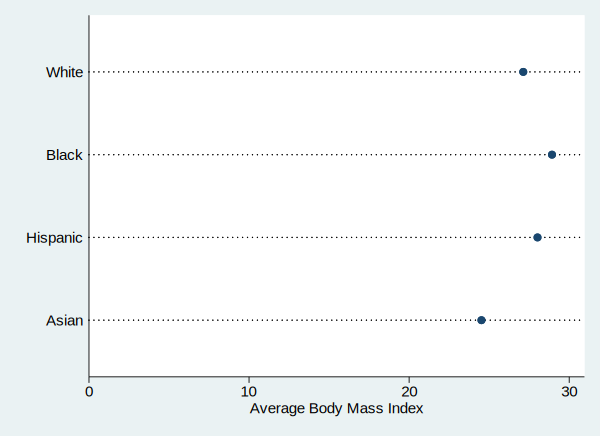

In [28]:
gr dot bmi, over(raceb) ytitle("Average Body Mass Index") ///
    name(bmi_race, replace)

Add a new categorical division between men and women to the dot plot.

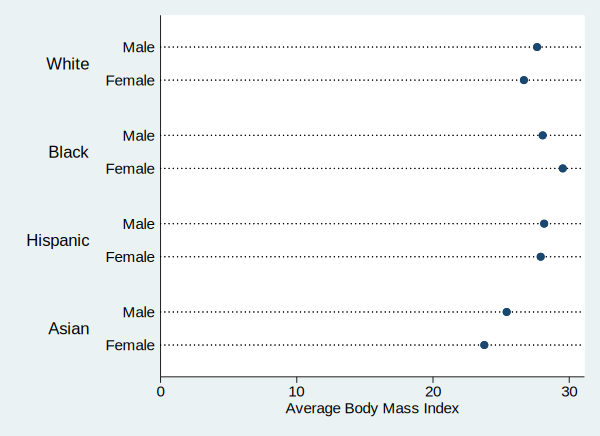

In [29]:
gr dot bmi, over(sex) over(raceb) ytitle("Average Body Mass Index") ///
    name(bmi_race, replace)

Each independent variable might influence BMI, but can also interact with
another independent variable, making the explanation of BMI more complex
and detailed because its predictors might also significantly interact with
each other. Visualization allows to explore that intuition in the same way
that it helped thinking about predictors to the dependent variable.

The graph below explores a relationship between three independent variables.
An additional trick in this graph is that its command runs over three lines.
The `///` indicates that you have to select all three lines to properly run
the graph command. This trick helps formatting do-files in short lines.

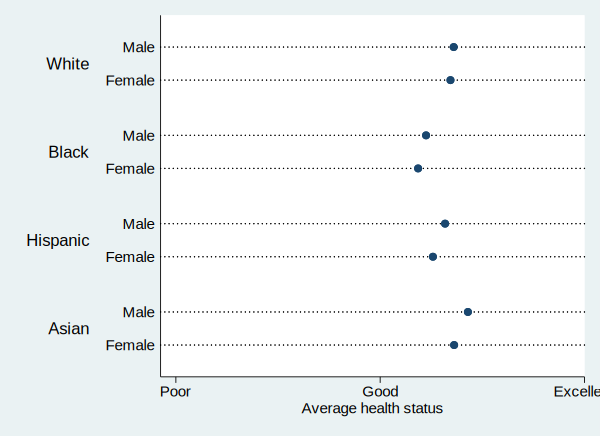

In [30]:
gr dot health, exclude0 yreverse over(sex) over(raceb) ///
    ylabel(1 "Excellent" 3 "Good" 5 "Poor") ytitle("Average health status") ///
    name(health_sex_race, replace)

The graph uses several options: due to the numerical coding of the `health`
variable, we had to remove 0 from the dot plot, and reverse the axis. We also
made the horizontal (y) axis more legible by adding (y)labels and a (y)title.
Note that the visual difference is naturally not sufficient to establish that
there is a significant difference in mean BMI across racial/ethnic groups.

# Finalizing The Dataset

Patterns of missing values
--------------------------

Finally, let's see how many observations have all variables measured for our
selection of variables. The `misstable` command produces a pattern that shows
the number of observations with no missing values across all listed variables.
Let's first check our core demographics and socio-economic indicators:

In [31]:
misstable pat age sex raceb health earnings uninsured, freq


   Missing-value patterns
     (1 means complete)

              |   Pattern
    Frequency |  1
  ------------+-------------
       32,633 |  1
              |
          381 |  0
  ------------+-------------
       33,014 |

  Variables are  (1) raceb


There are only a few missing values in the selection of variables above, due
to the fact that our simplified `raceb` variable excludes some small groups.
Now let's see what happens when we add the 'variable' to that list:

In [32]:
misstable pat age sex health raceb earnings uninsured bmi


   Missing-value patterns
     (1 means complete)

              |   Pattern
    Percent   |  1  2
  ------------+-------------
       90%    |  1  1
              |
        9     |  1  0
        1     |  0  1
       <1     |  0  0
  ------------+-------------
      100%    |

  Variables are  (1) raceb  (2) bmi


We removed the `freq` option to get the size of the data with no missing
values as a percentage: we lose 10% of the data due to missing values, mostly
concentrated in the Body Mass Index measurement. The IHIS/NHIS documentation
explains why this happens with the public data files (you can try to guess).

Subsetting
----------

We can now finalize the dataset by deleting observations with missing data in
our selection of variables. The final count is the actual sample size that we
will analyze at later stages of the course.

In [33]:
drop if mi(bmi, age, sex, health, raceb, earnings, uninsured)

(3,278 observations deleted)


Final count.

In [34]:
count

  29,736


# End

Close log (if opened).

In [35]:
cap log close

The command above closes the log that we opened when we started this do-file.
Logs are essential to keep records of your analysis. They complement do-files,
which are records of your commands and comments only. Now that you have closed
the log below, have a quick look at it.

In [36]:
// view code/week2.log

We are done. Just quit the application, have a nice week, and see you soon :)